In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
import math
from itertools import combinations, product
import time
import networkx as nx



df = pd.read_csv('Market_Basket_Optimisation.csv')
print(f"Размер датасета: {df.shape}")
print("Первые 5 строк:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())

In [ ]:
print("Описание данных")

transactions = []
for i in range(len(df)):
    transaction = [item for item in df.iloc[i][1:] if pd.notna(item)]
    transactions.append(transaction)

print(f"Всего записей в таблице: {len(transactions)}")

transaction_lengths = [len(transaction) for transaction in transactions]

print(f"Среднее кол-во продуктов в списке: {np.mean(transaction_lengths):.2f}")
print(f"Максимальное кол-во продуктов в списке: {max(transaction_lengths)}")
print(f"Минимальное кол-во продуктов в списке: {min(transaction_lengths)}")

Описание данных
Всего записей в таблице: 7500
Среднее кол-во продуктов в списке: 2.91
Максимальное кол-во продуктов в списке: 18
Минимальное кол-во продуктов в списке: 0


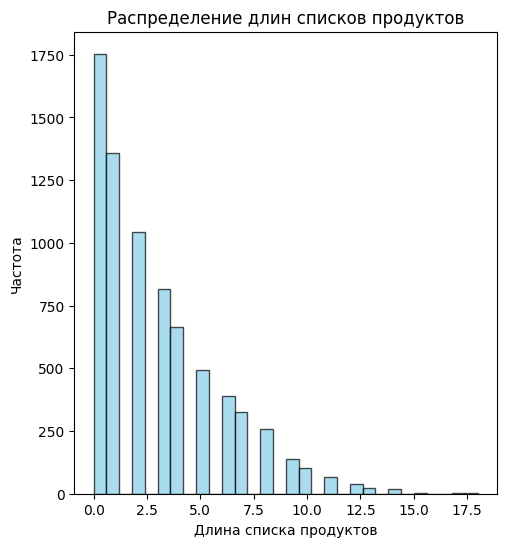

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(transaction_lengths, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Длина списка продуктов')
plt.ylabel('Частота')
plt.title('Распределение длин списков продуктов')

plt.show()

In [ ]:
all_items = [item for transaction in transactions for item in transaction]
unique_items = set(all_items)
print(f"\nКоличество уникальных товаров: {len(unique_items)}")

print('\nСписок уникальных товаров')

sorted_items = sorted(unique_items)

cols = 4
rows = (len(sorted_items) + cols - 1) // cols

for i in range(rows):
    line = ""
    for j in range(cols):
        idx = i + j * rows
        if idx < len(sorted_items):
            line += f"   - {sorted_items[idx]:20}"
    print(line)


Количество уникальных товаров: 120

Список уникальных товаров
   -  asparagus             - cookies                - honey                  - rice                
   - almonds                - cooking oil            - hot dogs               - salad               
   - antioxydant juice      - corn                   - ketchup                - salmon              
   - asparagus              - cottage cheese         - light cream            - salt                
   - avocado                - cream                  - light mayo             - sandwich            
   - babies food            - dessert wine           - low fat yogurt         - shallot             
   - bacon                  - eggplant               - magazines              - shampoo             
   - barbecue sauce         - eggs                   - mashed potato          - shrimp              
   - black tea              - energy bar             - mayonnaise             - soda                
   - blueberries            

In [ ]:
print('15 самых популярных товаров')
item_counts = Counter(all_items)
top_items = item_counts.most_common(15)

print(f"{'№':<2} {'Товар':<25} {'Количество':<12} {'Support':<10}")
print("-" * 55)
for i, (item, count) in enumerate(top_items, 1):
    support = count / len(transactions)
    print(f"{i:<2} {item:<25} {count:<12} {support:.4f}")

15 самых популярных товаров
№  Товар                     Количество   Support   
-------------------------------------------------------
1  mineral water             1210         0.1613
2  eggs                      1069         0.1425
3  french fries              1038         0.1384
4  spaghetti                 952          0.1269
5  green tea                 893          0.1191
6  chocolate                 839          0.1119
7  milk                      791          0.1055
8  pancakes                  633          0.0844
9  low fat yogurt            527          0.0703
10 ground beef               519          0.0692
11 cake                      510          0.0680
12 escalope                  452          0.0603
13 frozen smoothie           442          0.0589
14 olive oil                 426          0.0568
15 chicken                   406          0.0541


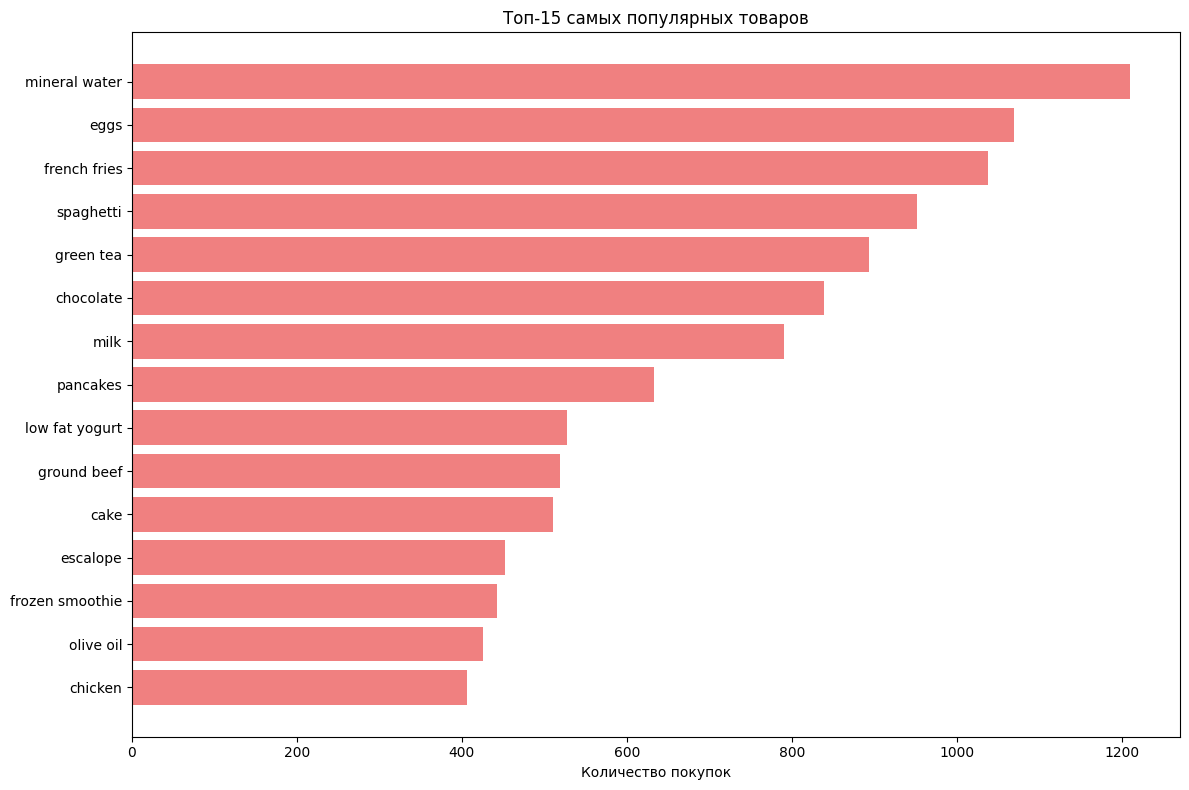

In [ ]:
plt.figure(figsize=(12, 8))
items, counts = zip(*top_items)
y_pos = np.arange(len(items))

plt.barh(y_pos, counts, color='lightcoral')
plt.yticks(y_pos, items)
plt.xlabel('Количество покупок')
plt.title('Топ-15 самых популярных товаров')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print(f"Размер закодированной матрицы: {df_encoded.shape}")
print(f"Количество товаров: {len(te.columns_)}")
print("\nПример закодированных данных (первые 10 товаров):")
print(df_encoded.iloc[:, :10].head())

Размер закодированной матрицы: (7500, 120)
Количество товаров: 120

Пример закодированных данных (первые 10 товаров):
    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False    False              False      False    False        False   
1       False    False              False      False    False        False   
2       False    False              False      False     True        False   
3       False    False              False      False    False        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  
0  False           False      False        False  
1  False           False      False        False  
2  False           False      False        False  
3  False           False      False        False  
4  False           False      False        False  



Анализ длин транзакций:
Распределение длин транзакций:
 0 товаров: 1754 транзакций ( 23.4%)
 1 товаров: 1358 транзакций ( 18.1%)
 2 товаров: 1044 транзакций ( 13.9%)
 3 товаров:  816 транзакций ( 10.9%)
 4 товаров:  665 транзакций (  8.9%)
 5 товаров:  495 транзакций (  6.6%)
 6 товаров:  388 транзакций (  5.2%)
 7 товаров:  327 транзакций (  4.4%)
 8 товаров:  259 транзакций (  3.5%)
 9 товаров:  139 транзакций (  1.9%)
10 товаров:  102 транзакций (  1.4%)
11 товаров:   67 транзакций (  0.9%)
12 товаров:   40 транзакций (  0.5%)
13 товаров:   22 транзакций (  0.3%)
14 товаров:   17 транзакций (  0.2%)


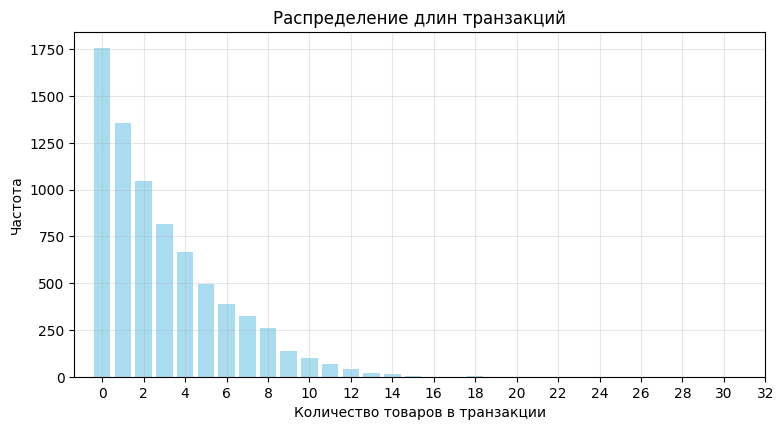


АНАЛИЗ КРУПНЫХ ПОКУПОК (≥20 товаров):
Транзакций с ≥20 товаров: 0 (0.0%)
Транзакций с ≥25 товаров: 0
Максимальная транзакция: 18 товаров


In [ ]:
print(f"\nАнализ длин транзакций:")
length_counts = pd.Series(transaction_lengths).value_counts().sort_index()
print("Распределение длин транзакций:")
for length, count in length_counts.head(15).items():
    percentage = (count / len(transactions)) * 100
    print(f"{length:2} товаров: {count:4} транзакций ({percentage:5.1f}%)")

plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.bar(length_counts.index, length_counts.values, alpha=0.7, color='skyblue')
plt.xlabel('Количество товаров в транзакции')
plt.ylabel('Частота')
plt.title('Распределение длин транзакций')
plt.xticks(range(0, 33, 2))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

large_transactions = [t for t in transactions if len(t) >= 20]
print(f"\nАНАЛИЗ КРУПНЫХ ПОКУПОК (≥20 товаров):")
print(f"Транзакций с ≥20 товаров: {len(large_transactions)} ({len(large_transactions)/len(transactions)*100:.1f}%)")
print(f"Транзакций с ≥25 товаров: {len([t for t in transactions if len(t) >= 25])}")
print(f"Максимальная транзакция: {max(transaction_lengths)} товаров")

if large_transactions:
    print("\nПРИМЕРЫ КРУПНЫХ ПОКУПОК:")
    for i, transaction in enumerate(large_transactions[:3]):
        print(f"Транзакция {i+1} ({len(transaction)} товаров): {transaction[:10]}...")  # Показываем первые 10 товаров

In [ ]:
min_support = 0.005
min_confidence = 0.3
max_len = 4
min_lift = 1.0

frequent_itemsets = apriori(df_encoded, 
                           min_support=min_support, 
                           use_colnames=True,
                           max_len=max_len)

print(f"\nкол-во частых наборов: {len(frequent_itemsets)}")

if len(frequent_itemsets) > 0:
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    frequent_itemsets['items_list'] = frequent_itemsets['itemsets'].apply(lambda x: list(x))
    
    print("\nАнализ частых наборов:")
    length_stats = frequent_itemsets.groupby('length').agg({
        'support': ['count', 'mean', 'min', 'max']
    }).round(4)
    print(length_stats)
    
    for length in sorted(frequent_itemsets['length'].unique()):
        itemsets_of_length = frequent_itemsets[frequent_itemsets['length'] == length]
        print(f"\nНАБОРЫ ИЗ {length} ТОВАРОВ:")
        top_itemsets = itemsets_of_length.nlargest(5, 'support')
        for i, (idx, row) in enumerate(top_itemsets.iterrows(), 1):
            items = list(row['itemsets'])
            print(f"  {i}. {items} - support: {row['support']:.4f}")


кол-во частых наборов: 431

Анализ частых наборов:
       support                        
         count    mean     min     max
length                                
1           96  0.0296  0.0051  0.1613
2          270  0.0104  0.0051  0.0463
3           65  0.0069  0.0051  0.0127

НАБОРЫ ИЗ 1 ТОВАРОВ:
  1. ['mineral water'] - support: 0.1613
  2. ['eggs'] - support: 0.1425
  3. ['french fries'] - support: 0.1384
  4. ['spaghetti'] - support: 0.1269
  5. ['green tea'] - support: 0.1191

НАБОРЫ ИЗ 2 ТОВАРОВ:
  1. ['spaghetti', 'mineral water'] - support: 0.0463
  2. ['mineral water', 'eggs'] - support: 0.0403
  3. ['mineral water', 'milk'] - support: 0.0387
  4. ['chocolate', 'mineral water'] - support: 0.0320
  5. ['mineral water', 'ground beef'] - support: 0.0301

НАБОРЫ ИЗ 3 ТОВАРОВ:
  1. ['spaghetti', 'mineral water', 'milk'] - support: 0.0127
  2. ['spaghetti', 'mineral water', 'ground beef'] - support: 0.0125
  3. ['spaghetti', 'mineral water', 'eggs'] - support: 0.0119
  4. [

In [ ]:
rules = association_rules(frequent_itemsets, 
                         metric="confidence", 
                         min_threshold=min_confidence)

rules = rules[rules['lift'] >= min_lift]

print(f"СГЕНЕРИРОВАНО ПРАВИЛ: {len(rules)}")

if len(rules) > 0:
    rules['conviction'] = (1 - rules['support']) / (1 - rules['confidence'])
    
    rules_sorted = rules.sort_values('lift', ascending=False)
    
    print("\nТОП-20 САМЫХ СИЛЬНЫХ ПРАВИЛ (по лифту):")
    print("="*100)
    print(f"{'№':<3} {'ПРАВИЛО':<40} {'SUPPORT':<8} {'CONFIDENCE':<10} {'LIFT':<8} {'CONVICTION':<10}")
    print("-" * 100)
    
    for i, (idx, rule) in enumerate(rules_sorted.head(20).iterrows(), 1):
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])
        rule_str = f"{antecedents} → {consequents}"
        
        print(f"{i:<3} {rule_str:<40} {rule['support']:.4f}   {rule['confidence']:.4f}    "
              f"{rule['lift']:.4f}   {rule['conviction']:.4f}")

СГЕНЕРИРОВАНО ПРАВИЛ: 129

ТОП-20 САМЫХ СИЛЬНЫХ ПРАВИЛ (по лифту):
№   ПРАВИЛО                                  SUPPORT  CONFIDENCE LIFT     CONVICTION
----------------------------------------------------------------------------------------------------
1   ['spaghetti', 'frozen vegetables'] → ['ground beef'] 0.0059   0.3697    5.3432   1.5774
2   ['herb & pepper'] → ['ground beef']      0.0060   0.3237    4.6783   1.4699
3   ['mineral water', 'frozen vegetables'] → ['ground beef'] 0.0057   0.3139    4.5357   1.4491
4   ['ground beef', 'frozen vegetables'] → ['spaghetti'] 0.0059   0.5714    4.5018   2.3196
5   ['tomato sauce'] → ['spaghetti']         0.0056   0.5122    4.0352   2.0385
6   ['mineral water', 'soup'] → ['milk']     0.0076   0.4101    3.8882   1.6822
7   ['ground beef', 'olive oil'] → ['spaghetti'] 0.0055   0.4824    3.8000   1.9213
8   ['pancakes', 'ground beef'] → ['spaghetti'] 0.0055   0.4713    3.7127   1.8810
9   ['milk', 'soup'] → ['mineral water']     0.0076   0.5876

In [ ]:
print("АНАЛИЗ КАЧЕСТВА ПРАВИЛ: ПОЛЕЗНЫЕ и ТРИВИАЛЬНЫЕ")
print("="*80)

if len(rules) > 0:
    HIGH_LIFT = 2.0
    HIGH_CONFIDENCE = 0.6
    
    useful_rules = rules[(rules['lift'] >= HIGH_LIFT) & (rules['confidence'] >= HIGH_CONFIDENCE)]
    trivial_rules = rules[(rules['lift'] < 1.5) | (rules['confidence'] < 0.4)]
    medium_rules = rules[~rules.index.isin(useful_rules.index) & ~rules.index.isin(trivial_rules.index)]
    
    print(f"ПОЛЕЗНЫЕ правила (lift ≥ {HIGH_LIFT} и confidence ≥ {HIGH_CONFIDENCE}): {len(useful_rules)}")
    print(f"СРЕДНИЕ правила: {len(medium_rules)}")
    print(f"ТРИВИАЛЬНЫЕ правила: {len(trivial_rules)}")
    
    if len(useful_rules) > 0:
        print(f"\nПОЛЕЗНЫЕ ПРАВИЛА (первые 20):")
        print("-" * 80)
        for i, (idx, rule) in enumerate(useful_rules.head(20).iterrows(), 1):
            antecedents = list(rule['antecedents'])
            consequents = list(rule['consequents'])
            print(f"{i}. {antecedents} → {consequents}")
            print(f"   Support: {rule['support']:.4f}, Confidence: {rule['confidence']:.4f}, "
                  f"Lift: {rule['lift']:.4f}")
            print(f"   ИНТЕРПРЕТАЦИЯ: При покупке {antecedents} с вероятностью {rule['confidence']:.1%} "
                  f"покупают также {consequents}")
            print()
    
    if len(trivial_rules) > 0:
        print(f"\nТРИВИАЛЬНЫЕ ПРАВИЛА (примеры):")
        print("-" * 80)
        trivial_sample = trivial_rules.head(5)
        for i, (idx, rule) in enumerate(trivial_sample.iterrows(), 1):
            antecedents = list(rule['antecedents'])
            consequents = list(rule['consequents'])
            print(f"{i}. {antecedents} → {consequents}")
            print(f"   Support: {rule['support']:.4f}, Confidence: {rule['confidence']:.4f}, "
                  f"Lift: {rule['lift']:.4f}")
            print(f"   ПРИЧИНА ТРИВИАЛЬНОСТИ: ", end="")
            if rule['lift'] < 1.5:
                print(f"слабый лифт (правило почти случайное)")
            elif rule['confidence'] < 0.4:
                print(f"низкая достоверность (редко выполняется)")
            print()

АНАЛИЗ КАЧЕСТВА ПРАВИЛ: ПОЛЕЗНЫЕ и ТРИВИАЛЬНЫЕ
ПОЛЕЗНЫЕ правила (lift ≥ 2.0 и confidence ≥ 0.6): 0
СРЕДНИЕ правила: 60
ТРИВИАЛЬНЫЕ правила: 69

ТРИВИАЛЬНЫЕ ПРАВИЛА (примеры):
--------------------------------------------------------------------------------
1. ['almonds'] → ['eggs']
   Support: 0.0059, Confidence: 0.3121, Lift: 2.1894
   ПРИЧИНА ТРИВИАЛЬНОСТИ: низкая достоверность (редко выполняется)

2. ['almonds'] → ['mineral water']
   Support: 0.0061, Confidence: 0.3262, Lift: 2.0222
   ПРИЧИНА ТРИВИАЛЬНОСТИ: низкая достоверность (редко выполняется)

3. ['avocado'] → ['mineral water']
   Support: 0.0079, Confidence: 0.3073, Lift: 1.9047
   ПРИЧИНА ТРИВИАЛЬНОСТИ: низкая достоверность (редко выполняется)

4. ['cereals'] → ['milk']
   Support: 0.0068, Confidence: 0.3036, Lift: 2.8784
   ПРИЧИНА ТРИВИАЛЬНОСТИ: низкая достоверность (редко выполняется)

5. ['cereals'] → ['mineral water']
   Support: 0.0081, Confidence: 0.3631, Lift: 2.2506
   ПРИЧИНА ТРИВИАЛЬНОСТИ: низкая достоверность (ре

In [ ]:
print('Алогритм FPG\n')

min_support = 0.005
min_confidence = 0.3
max_len = 4

print(f"параметры для анализа fpg:")
print(f"min_support = {min_support} - правило встречается в 0,5% покупок")
print(f"min_confidence = {min_confidence} - достоверность не менее 30%")
print(f"max_len = {max_len} - максимальная длина набора товаров")

frequent_itemsets_fp = fpgrowth(df_encoded, 
                               min_support=min_support, 
                               use_colnames=True,
                               max_len=max_len)

print(f"\nколичество частых наборов: {len(frequent_itemsets_fp)}")

Алогритм FPG

параметры для анализа fpg:
min_support = 0.005 - правило встречается в 0,5% покупок
min_confidence = 0.3 - достоверность не менее 30%
max_len = 4 - максимальная длина набора товаров

количество частых наборов: 431


In [ ]:
if len(frequent_itemsets_fp) > 0:
    frequent_itemsets_fp['length'] = frequent_itemsets_fp['itemsets'].apply(lambda x: len(x))
    
    print("\nраспределение частых наборов fpg по длине:")
    length_dist_fp = frequent_itemsets_fp['length'].value_counts().sort_index()
    for length, count in length_dist_fp.items():
        print(f"Наборы из {length} товаров: {count} шт.")
    
    print(f"\n10 самых чаcтых наборов fpg:")
    top_itemsets_fp = frequent_itemsets_fp.nlargest(10, 'support')
    for i, (idx, row) in enumerate(top_itemsets_fp.iterrows(), 1):
        items = list(row['itemsets'])
        print(f"{i:2}. {items} - support: {row['support']:.4f}")


распределение частых наборов fpg по длине:
Наборы из 1 товаров: 96 шт.
Наборы из 2 товаров: 270 шт.
Наборы из 3 товаров: 65 шт.

10 самых чаcтых наборов fpg:
 1. ['mineral water'] - support: 0.1613
 2. ['eggs'] - support: 0.1425
 3. ['french fries'] - support: 0.1384
 4. ['spaghetti'] - support: 0.1269
 5. ['green tea'] - support: 0.1191
 6. ['chocolate'] - support: 0.1117
 7. ['milk'] - support: 0.1055
 8. ['pancakes'] - support: 0.0844
 9. ['low fat yogurt'] - support: 0.0703
10. ['ground beef'] - support: 0.0692


In [ ]:
print("\nГенерация ассоциативных правил")

rules_fp = association_rules(frequent_itemsets_fp, 
                            metric="confidence", 
                            min_threshold=min_confidence)

rules_fp = rules_fp[rules_fp['lift'] >= 1.0]

print(f"кол-во правил fpg: {len(rules_fp)}")


Генерация ассоциативных правил
кол-во правил fpg: 129


In [ ]:
if len(rules_fp) > 0:
    rules_fp['conviction'] = (1 - rules_fp['support']) / (1 - rules_fp['confidence'])
    rules_fp['antecedent_len'] = rules_fp['antecedents'].apply(lambda x: len(x))
    rules_fp['consequent_len'] = rules_fp['consequents'].apply(lambda x: len(x))
    rules_fp['total_len'] = rules_fp['antecedent_len'] + rules_fp['consequent_len']
    
    print(f"\nанализ сложности правил fpg:")
    print(f"Правила с 1 товаром в антецеденте: {len(rules_fp[rules_fp['antecedent_len'] == 1])}")
    print(f"Правила с 2+ товарами в антецеденте: {len(rules_fp[rules_fp['antecedent_len'] >= 2])}")
    print(f"Правила с 2+ товарами в консеквенте: {len(rules_fp[rules_fp['consequent_len'] >= 2])}")
    print(f"Максимальная сложность правила: {rules_fp['total_len'].max()} товаров")
    
    rules_fp_sorted = rules_fp.sort_values('lift', ascending=False)
    
    print(f"\n25 самых сложных правил fpg:")
    print("="*120)
    print(f"{'№':<3} {'АНТЕЦЕДЕНТ':<30} → {'КОНСЕКВЕНТ':<30} {'SUP':<6} {'CONF':<6} {'LIFT':<6} {'SIZE':<4}")
    print("-" * 120)
    
    for i, (idx, rule) in enumerate(rules_fp_sorted.head(25).iterrows(), 1):
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])
        
        ant_str = str(antecedents) if len(antecedents) <= 3 else str(antecedents[:3]) + "..."
        cons_str = str(consequents) if len(consequents) <= 3 else str(consequents[:3]) + "..."
        
        print(f"{i:<3} {ant_str:<30} → {cons_str:<30} {rule['support']:.4f} {rule['confidence']:.4f} "
              f"{rule['lift']:.4f} {rule['total_len']:2}")


анализ сложности правил fpg:
Правила с 1 товаром в антецеденте: 47
Правила с 2+ товарами в антецеденте: 82
Правила с 2+ товарами в консеквенте: 0
Максимальная сложность правила: 3 товаров

25 самых сложных правил fpg:
№   АНТЕЦЕДЕНТ                     → КОНСЕКВЕНТ                     SUP    CONF   LIFT   SIZE
------------------------------------------------------------------------------------------------------------------------
1   ['spaghetti', 'frozen vegetables'] → ['ground beef']                0.0059 0.3697 5.3432  3
2   ['herb & pepper']              → ['ground beef']                0.0060 0.3237 4.6783  2
3   ['mineral water', 'frozen vegetables'] → ['ground beef']                0.0057 0.3139 4.5357  3
4   ['ground beef', 'frozen vegetables'] → ['spaghetti']                  0.0059 0.5714 4.5018  3
5   ['tomato sauce']               → ['spaghetti']                  0.0056 0.5122 4.0352  2
6   ['mineral water', 'soup']      → ['milk']                       0.0076 0.4101 3.8882

In [ ]:
print("анализ сложных ассоциаций fpg (2+ ТОВАРА В АНТЕЦЕДЕНТЕ)")
print("="*80)

if len(rules_fp) > 0:
    complex_rules_fp = rules_fp[rules_fp['antecedent_len'] >= 2]
    complex_rules_fp = complex_rules_fp.sort_values('lift', ascending=False)
    
    print(f"кол-во сложных правил (2+ товара в антецеденте): {len(complex_rules_fp)}")
    
    if len(complex_rules_fp) > 0:
        print(f"\n15 сложных правил fpg:")
        print("-" * 100)
        for i, (idx, rule) in enumerate(complex_rules_fp.head(15).iterrows(), 1):
            antecedents = list(rule['antecedents'])
            consequents = list(rule['consequents'])
            
            print(f"{i:2}. ЕСЛИ покупают {antecedents}")
            print(f"    ТО также покупают {consequents}")
            print(f"    Вероятность: {rule['confidence']:.1%} | Сила связи: {rule['lift']:.2f}x | Поддержка: {rule['support']:.4f}")
            print()
    
    large_itemsets_fp = frequent_itemsets_fp[frequent_itemsets_fp['length'] >= 3]
    if len(large_itemsets_fp) > 0:
        print(f"\nкрупные наборы товаров fpg (3+ товара):")
        large_itemsets_fp_sorted = large_itemsets_fp.sort_values('support', ascending=False)
        
        for i, (idx, row) in enumerate(large_itemsets_fp_sorted.head(10).iterrows(), 1):
            items = list(row['itemsets'])
            print(f"{i:2}. {items}")
            print(f"    Support: {row['support']:.4f} (встречается в ~{row['support']*len(transactions):.0f} транзакциях)")
            print()

анализ сложных ассоциаций fpg (2+ ТОВАРА В АНТЕЦЕДЕНТЕ)
кол-во сложных правил (2+ товара в антецеденте): 82

15 сложных правил fpg:
----------------------------------------------------------------------------------------------------
 1. ЕСЛИ покупают ['spaghetti', 'frozen vegetables']
    ТО также покупают ['ground beef']
    Вероятность: 37.0% | Сила связи: 5.34x | Поддержка: 0.0059

 2. ЕСЛИ покупают ['mineral water', 'frozen vegetables']
    ТО также покупают ['ground beef']
    Вероятность: 31.4% | Сила связи: 4.54x | Поддержка: 0.0057

 3. ЕСЛИ покупают ['ground beef', 'frozen vegetables']
    ТО также покупают ['spaghetti']
    Вероятность: 57.1% | Сила связи: 4.50x | Поддержка: 0.0059

 4. ЕСЛИ покупают ['mineral water', 'soup']
    ТО также покупают ['milk']
    Вероятность: 41.0% | Сила связи: 3.89x | Поддержка: 0.0076

 5. ЕСЛИ покупают ['ground beef', 'olive oil']
    ТО также покупают ['spaghetti']
    Вероятность: 48.2% | Сила связи: 3.80x | Поддержка: 0.0055

 6. ЕСЛИ пок

In [ ]:
print("Самые ценные правила fpg")
print("="*80)

if len(rules_fp) > 0:
    HIGH_LIFT = 2.0
    HIGH_CONFIDENCE = 0.5
    MIN_SUPPORT = 0.01
    
    valuable_rules = rules_fp[
        (rules_fp['lift'] >= HIGH_LIFT) & 
        (rules_fp['confidence'] >= HIGH_CONFIDENCE) & 
        (rules_fp['support'] >= MIN_SUPPORT)
    ].sort_values('lift', ascending=False)
    
    print(f"кол-во ценных правил (lift ≥ {HIGH_LIFT}, confidence ≥ {HIGH_CONFIDENCE}, support ≥ {MIN_SUPPORT}): {len(valuable_rules)}")
    
    if len(valuable_rules) > 0:
        print(f"\n10 самых ценных правил fpg:")
        print("="*100)
        
        for i, (idx, rule) in enumerate(valuable_rules.head(20).iterrows(), 1):
            antecedents = list(rule['antecedents'])
            consequents = list(rule['consequents'])
            
            print(f"{i:2}. {antecedents} → {consequents}")
            print(f"   Поддержка: {rule['support']:.4f} (встречается в {rule['support']*100:.1f}% транзакций)")
            print(f"   Достоверность: {rule['confidence']:.4f} (вероятность: {rule['confidence']*100:.1f}%)")
            print(f"   Лифт: {rule['lift']:.4f} (сила связи: в {rule['lift']:.1f} раз выше случайной)")
            print(f"   Убежденность: {rule['conviction']:.4f}")
            
            if rule['lift'] > 3:
                strength = "ОЧЕНЬ СИЛЬНАЯ"
            elif rule['lift'] > 2:
                strength = "СИЛЬНАЯ"
            else:
                strength = "УМЕРЕННАЯ"
                
            print(f"    ИНТЕРПРЕТАЦИЯ: {strength} связь. При покупке {antecedents} рекомендуется предлагать {consequents}")
            print()
    
    print(f"\nанализ правил fpg по типам ассоциаций:")
    
    single_antecedent = rules_fp[rules_fp['antecedent_len'] == 1]
    print(f" Простые правила (1 товар → 1+ товар): {len(single_antecedent)}")
    if len(single_antecedent) > 0:
        strong_simple = single_antecedent[single_antecedent['lift'] > 2]
        print(f"  - Сильные простые правила (lift > 2): {len(strong_simple)}")
    
    multi_antecedent = rules_fp[rules_fp['antecedent_len'] >= 2]
    print(f"- Сложные правила (2+ товара → 1+ товар): {len(multi_antecedent)}")
    if len(multi_antecedent) > 0:
        strong_complex = multi_antecedent[multi_antecedent['lift'] > 2]
        print(f"  - Сильные сложные правила (lift > 2): {len(strong_complex)}")

Самые ценные правила fpg
кол-во ценных правил (lift ≥ 2.0, confidence ≥ 0.5, support ≥ 0.01): 0

анализ правил fpg по типам ассоциаций:
 Простые правила (1 товар → 1+ товар): 47
  - Сильные простые правила (lift > 2): 43
- Сложные правила (2+ товара → 1+ товар): 82
  - Сильные сложные правила (lift > 2): 81


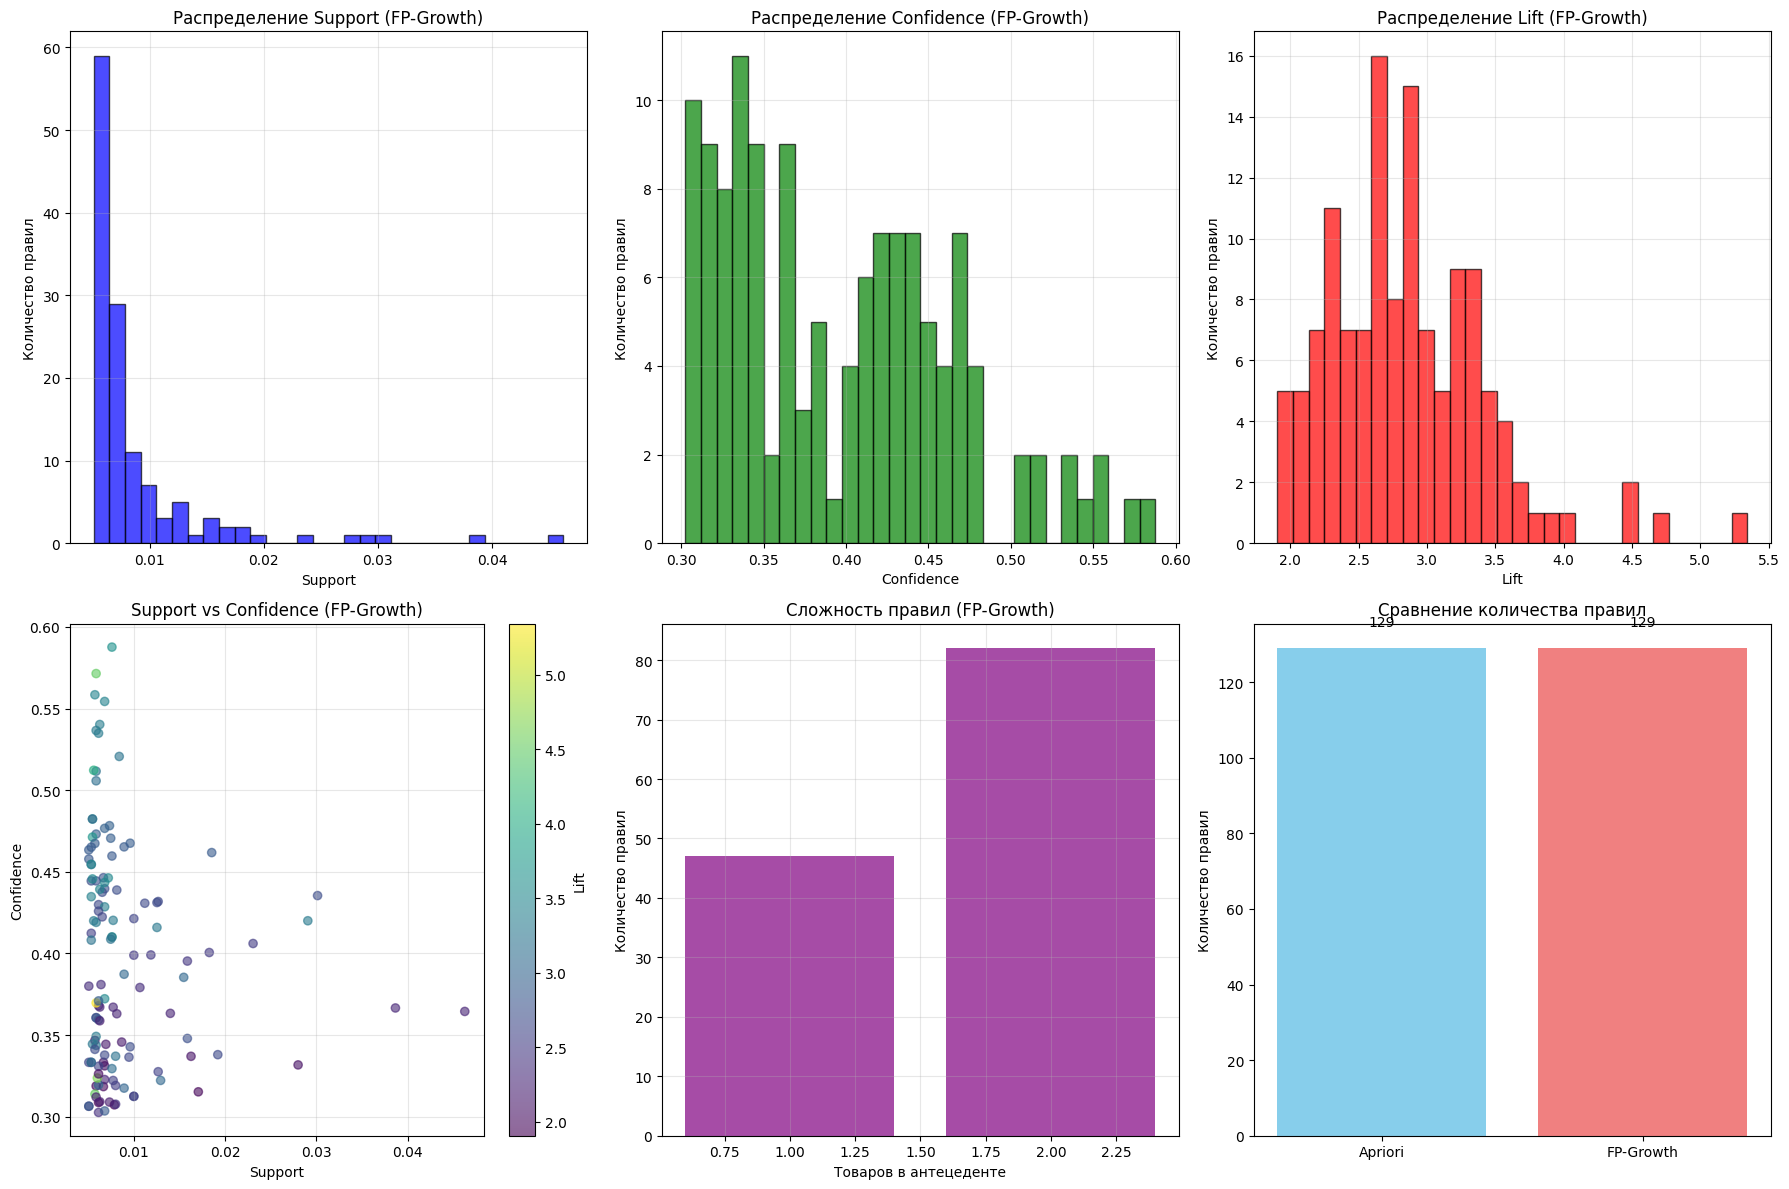

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Распределение поддержки правил
if len(rules_fp) > 0:
    axes[0, 0].hist(rules_fp['support'], bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[0, 0].set_xlabel('Support')
    axes[0, 0].set_ylabel('Количество правил')
    axes[0, 0].set_title('Распределение Support (FP-Growth)')
    axes[0, 0].grid(True, alpha=0.3)

# 2. Распределение достоверности
if len(rules_fp) > 0:
    axes[0, 1].hist(rules_fp['confidence'], bins=30, alpha=0.7, color='green', edgecolor='black')
    axes[0, 1].set_xlabel('Confidence')
    axes[0, 1].set_ylabel('Количество правил')
    axes[0, 1].set_title('Распределение Confidence (FP-Growth)')
    axes[0, 1].grid(True, alpha=0.3)

# 3. Распределение лифта
if len(rules_fp) > 0:
    axes[0, 2].hist(rules_fp['lift'], bins=30, alpha=0.7, color='red', edgecolor='black')
    axes[0, 2].set_xlabel('Lift')
    axes[0, 2].set_ylabel('Количество правил')
    axes[0, 2].set_title('Распределение Lift (FP-Growth)')
    axes[0, 2].grid(True, alpha=0.3)

# 4. Support vs Confidence
if len(rules_fp) > 0:
    scatter = axes[1, 0].scatter(rules_fp['support'], rules_fp['confidence'], 
                                c=rules_fp['lift'], cmap='viridis', alpha=0.6)
    axes[1, 0].set_xlabel('Support')
    axes[1, 0].set_ylabel('Confidence')
    axes[1, 0].set_title('Support vs Confidence (FP-Growth)')
    plt.colorbar(scatter, ax=axes[1, 0], label='Lift')
    axes[1, 0].grid(True, alpha=0.3)

# 5. Сложность правил
if len(rules_fp) > 0:
    complexity_dist = rules_fp['antecedent_len'].value_counts().sort_index()
    axes[1, 1].bar(complexity_dist.index, complexity_dist.values, alpha=0.7, color='purple')
    axes[1, 1].set_xlabel('Товаров в антецеденте')
    axes[1, 1].set_ylabel('Количество правил')
    axes[1, 1].set_title('Сложность правил (FP-Growth)')
    axes[1, 1].grid(True, alpha=0.3)

#6. Сравнение с apriori
if 'rules' in locals() and len(rules_fp) > 0:
    algorithms = ['Apriori', 'FP-Growth']
    rule_counts = [len(rules), len(rules_fp)]
    
    bars = axes[1, 2].bar(algorithms, rule_counts, color=['skyblue', 'lightcoral'])
    axes[1, 2].set_ylabel('Количество правил')
    axes[1, 2].set_title('Сравнение количества правил')
    for bar, count in zip(bars, rule_counts):
        axes[1, 2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                       f'{count}', ha='center', va='bottom')


plt.tight_layout()
plt.show()

In [ ]:
print("Определение минимальных значений поддержки (support) для наборов разной длины")
print("="*80)

def calculate_min_support_for_length(transactions, target_length, method='empirical'):
    total_transactions = len(transactions)
    
    if method == 'empirical':
        item_counts = {}
        
        for transaction in transactions:
            if len(transaction) >= target_length:
                for combo in combinations(sorted(transaction), target_length):
                    combo_key = tuple(sorted(combo))
                    item_counts[combo_key] = item_counts.get(combo_key, 0) + 1
        
        if item_counts:
            min_count = min(item_counts.values())
            max_count = max(item_counts.values())
            avg_count = np.mean(list(item_counts.values()))
            
            min_support = min_count / total_transactions
            max_support = max_count / total_transactions
            avg_support = avg_count / total_transactions
            
            return {
                'min_support': min_support,
                'max_support': max_support,
                'avg_support': avg_support,
                'min_count': min_count,
                'max_count': max_count,
                'num_combinations': len(item_counts),
                'valid_transactions': sum(1 for t in transactions if len(t) >= target_length)
            }
        else:
            return {
                'min_support': 0,
                'max_support': 0,
                'avg_support': 0,
                'min_count': 0,
                'max_count': 0,
                'num_combinations': 0,
                'valid_transactions': 0
            }
    
    elif method == 'theoretical':
        single_item_support = calculate_min_support_for_length(transactions, 1, 'empirical')
        base_support = single_item_support['min_support']
        
        theoretical_min_support = base_support ** target_length
        return {
            'min_support': theoretical_min_support,
            'max_support': single_item_support['max_support'],
            'avg_support': theoretical_min_support,
            'method': 'theoretical'
        }
    
    elif method == 'adaptive':
        valid_transactions = sum(1 for t in transactions if len(t) >= target_length)
        if valid_transactions == 0:
            return {'min_support': 0}
        
        adaptive_min_support = max(2 / total_transactions, 0.001)
        return {
            'min_support': adaptive_min_support,
            'valid_transactions': valid_transactions,
            'method': 'adaptive'
        }

print("Эмпирический анализ минимальной поддержки:")
print("="*90)
print(f"{'Длина':<6} {'Min Support':<12} {'Max Support':<12} {'Avg Support':<12} {'Комбинации':<12} {'Валидные':<10} {'Min Count':<10}")
print("-" * 90)

max_analyze_length = 5
results = []

for length in range(1, max_analyze_length + 1):
    result = calculate_min_support_for_length(transactions, length, 'empirical')
    results.append(result)
    
    print(f"{length:<6} {result['min_support']:<12.6f} {result['max_support']:<12.6f} "
          f"{result['avg_support']:<12.6f} {result['num_combinations']:<12} "
          f"{result['valid_transactions']:<10} {result['min_count']:<10}")

Определение минимальных значений поддержки (support) для наборов разной длины
Эмпирический анализ минимальной поддержки:
Длина  Min Support  Max Support  Avg Support  Комбинации   Валидные   Min Count 
------------------------------------------------------------------------------------------
1      0.000133     0.161333     0.024270     120          5746       1         
2      0.000133     0.046267     0.001334     5240         4388       1         
3      0.000133     0.012667     0.000295     46271        3344       1         
4      0.000133     0.003600     0.000165     134072       2528       1         
5      0.000133     0.001600     0.000139     218039       1863       1         



Визуализация минимальных значений support


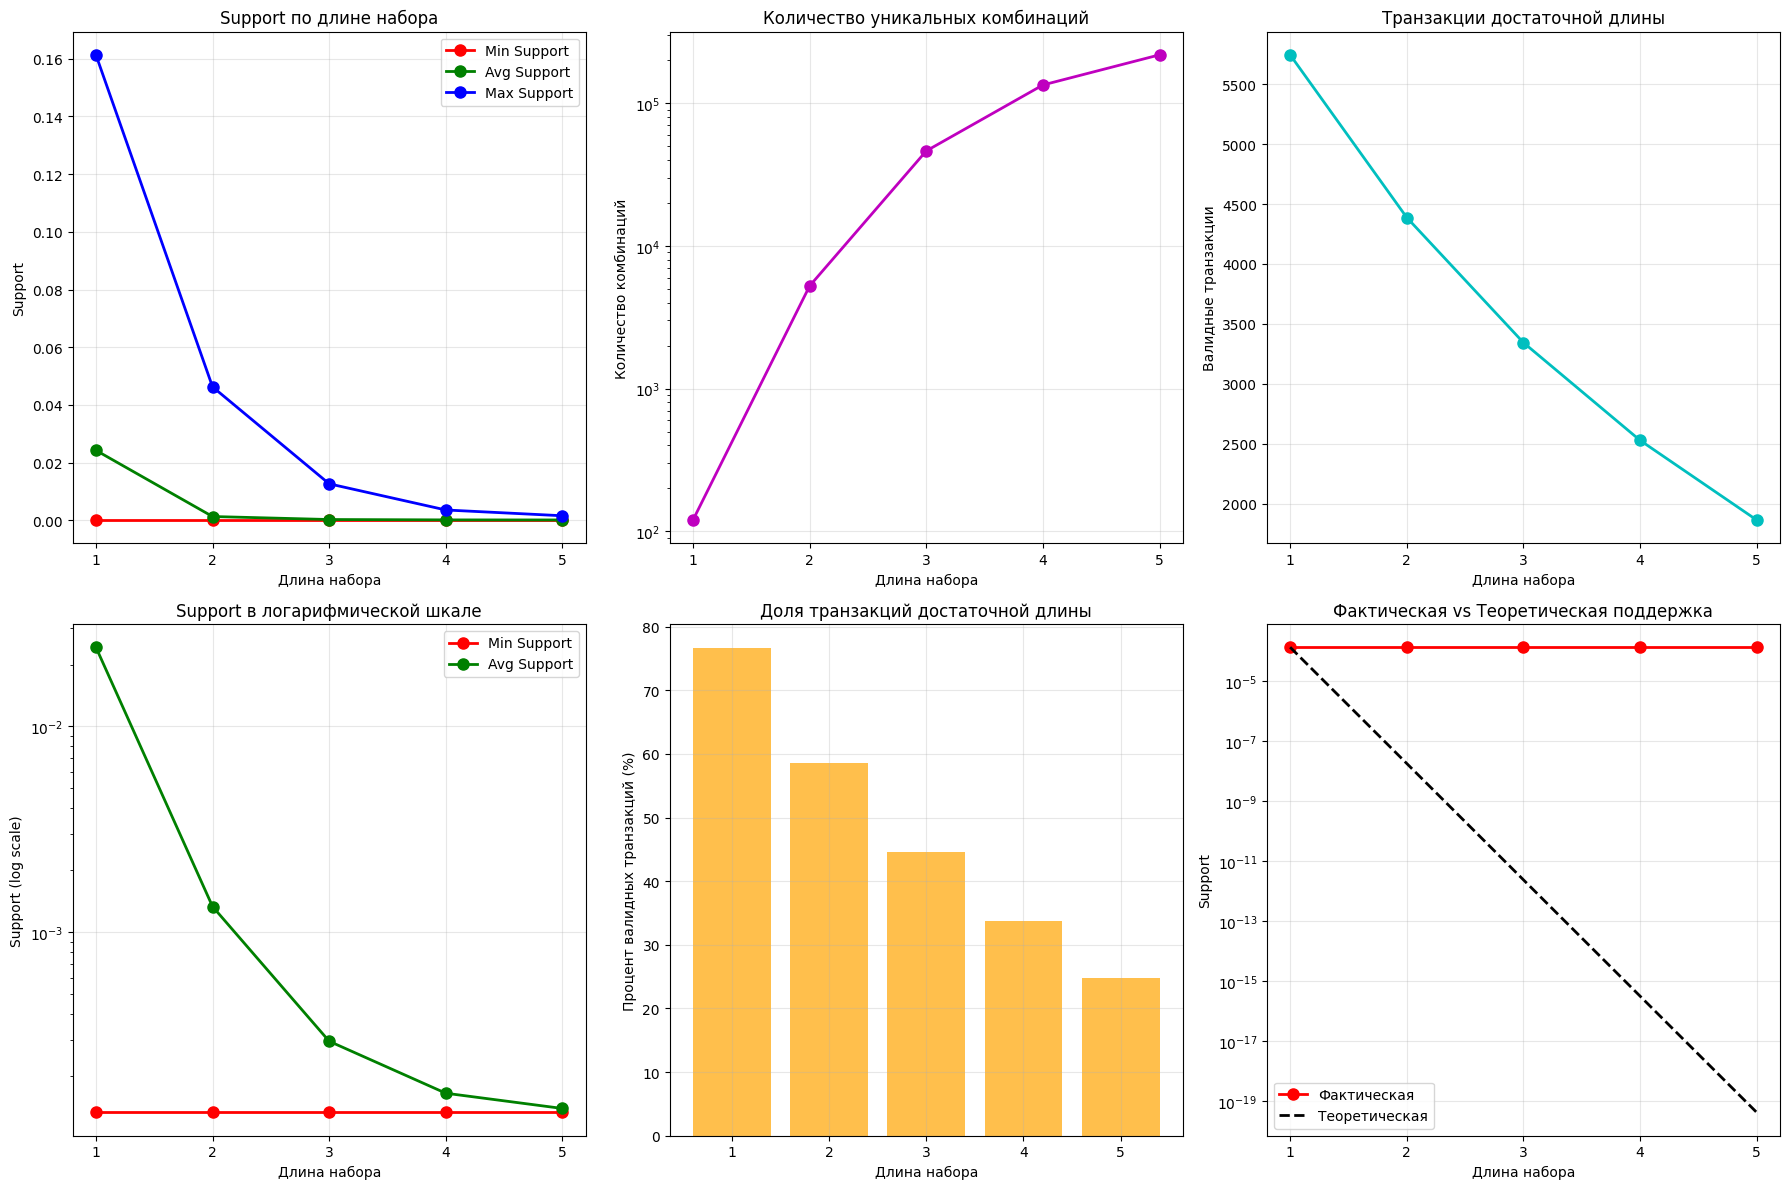

In [ ]:
print("\nВизуализация минимальных значений support")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Минимальная поддержка по длине набора
lengths = list(range(1, max_analyze_length + 1))
min_supports = [r['min_support'] for r in results]
max_supports = [r['max_support'] for r in results]
avg_supports = [r['avg_support'] for r in results]

axes[0, 0].plot(lengths, min_supports, 'ro-', linewidth=2, markersize=8, label='Min Support')
axes[0, 0].plot(lengths, avg_supports, 'go-', linewidth=2, markersize=8, label='Avg Support')
axes[0, 0].plot(lengths, max_supports, 'bo-', linewidth=2, markersize=8, label='Max Support')
axes[0, 0].set_xlabel('Длина набора')
axes[0, 0].set_ylabel('Support')
axes[0, 0].set_title('Support по длине набора')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(lengths)

# 2. Количество комбинаций по длине
num_combinations = [r['num_combinations'] for r in results]
axes[0, 1].plot(lengths, num_combinations, 'mo-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Длина набора')
axes[0, 1].set_ylabel('Количество комбинаций')
axes[0, 1].set_title('Количество уникальных комбинаций')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(lengths)
axes[0, 1].set_yscale('log')

# 3. Валидные транзакции по длине
valid_transactions = [r['valid_transactions'] for r in results]
axes[0, 2].plot(lengths, valid_transactions, 'co-', linewidth=2, markersize=8)
axes[0, 2].set_xlabel('Длина набора')
axes[0, 2].set_ylabel('Валидные транзакции')
axes[0, 2].set_title('Транзакции достаточной длины')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].set_xticks(lengths)

# 4. Логарифмическая шкала поддержки
axes[1, 0].semilogy(lengths, min_supports, 'ro-', linewidth=2, markersize=8, label='Min Support')
axes[1, 0].semilogy(lengths, avg_supports, 'go-', linewidth=2, markersize=8, label='Avg Support')
axes[1, 0].set_xlabel('Длина набора')
axes[1, 0].set_ylabel('Support (log scale)')
axes[1, 0].set_title('Support в логарифмической шкале')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(lengths)

# 5. Процент валидных транзакций
valid_percentage = [r['valid_transactions'] / len(transactions) * 100 for r in results]
axes[1, 1].bar(lengths, valid_percentage, alpha=0.7, color='orange')
axes[1, 1].set_xlabel('Длина набора')
axes[1, 1].set_ylabel('Процент валидных транзакций (%)')
axes[1, 1].set_title('Доля транзакций достаточной длины')
axes[1, 1].set_xticks(lengths)
axes[1, 1].grid(True, alpha=0.3)

# 6. Экспоненциальное уменьшение поддержки
if results[0]['min_support'] > 0:
    theoretical_supports = [results[0]['min_support'] ** length for length in lengths]
    axes[1, 2].plot(lengths, min_supports, 'ro-', linewidth=2, markersize=8, label='Фактическая')
    axes[1, 2].plot(lengths, theoretical_supports, 'k--', linewidth=2, label='Теоретическая')
    axes[1, 2].set_xlabel('Длина набора')
    axes[1, 2].set_ylabel('Support')
    axes[1, 2].set_title('Фактическая vs Теоретическая поддержка')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)
    axes[1, 2].set_xticks(lengths)
    axes[1, 2].set_yscale('log')

plt.tight_layout()
plt.show()

In [ ]:
print("Выбор минимального значения support")

print("АНАЛИЗ РЕЗУЛЬТАТОВ:")
for length, result in enumerate(results, 1):
    print(f"\nДля наборов из {length} товаров:")
    print(f"  Минимальная поддержка: {result['min_support']:.6f}")
    print(f"  Максимальная поддержка: {result['max_support']:.4f}")
    print(f"  Средняя поддержка: {result['avg_support']:.6f}")
    print(f"  Уникальных комбинаций: {result['num_combinations']}")
    print(f"  Валидных транзакций: {result['valid_transactions']} ({result['valid_transactions']/len(transactions)*100:.1f}%)")

print("\nдля алгоритма fpg:")

recommendations = []

for length in range(1, max_analyze_length + 1):
    result = results[length-1]
    
    if result['min_support'] > 0:
        basic_rec = result['min_support'] * 1.5
        
        if result['num_combinations'] > 1000:
            adaptive_rec = max(result['min_support'] * 2, 0.01)
        elif result['num_combinations'] > 100:
            adaptive_rec = max(result['min_support'] * 1.5, 0.005)
        else:
            adaptive_rec = result['min_support'] * 1.2
        
        conservative_rec = max(result['min_support'] * 3, 0.02)
        
        recommendations.append({
            'length': length,
            'basic': basic_rec,
            'adaptive': adaptive_rec,
            'conservative': conservative_rec
        })
        
        print(f"\nДля наборов из {length} товаров:")
        print(f"  -Базовая рекомендация: min_support = {basic_rec:.6f}")
        print(f"  -Адаптивная рекомендация: min_support = {adaptive_rec:.6f}")
        print(f"  -Консервативная рекомендация: min_support = {conservative_rec:.6f}")
        print(f"  -Обоснование: {result['num_combinations']} комбинаций, "
              f"минимум {result['min_count']} вхождений")

Выбор минимального значения support
АНАЛИЗ РЕЗУЛЬТАТОВ:

Для наборов из 1 товаров:
  Минимальная поддержка: 0.000133
  Максимальная поддержка: 0.1613
  Средняя поддержка: 0.024270
  Уникальных комбинаций: 120
  Валидных транзакций: 5746 (76.6%)

Для наборов из 2 товаров:
  Минимальная поддержка: 0.000133
  Максимальная поддержка: 0.0463
  Средняя поддержка: 0.001334
  Уникальных комбинаций: 5240
  Валидных транзакций: 4388 (58.5%)

Для наборов из 3 товаров:
  Минимальная поддержка: 0.000133
  Максимальная поддержка: 0.0127
  Средняя поддержка: 0.000295
  Уникальных комбинаций: 46271
  Валидных транзакций: 3344 (44.6%)

Для наборов из 4 товаров:
  Минимальная поддержка: 0.000133
  Максимальная поддержка: 0.0036
  Средняя поддержка: 0.000165
  Уникальных комбинаций: 134072
  Валидных транзакций: 2528 (33.7%)

Для наборов из 5 товаров:
  Минимальная поддержка: 0.000133
  Максимальная поддержка: 0.0016
  Средняя поддержка: 0.000139
  Уникальных комбинаций: 218039
  Валидных транзакций: 186

In [ ]:
print("Оптимизация параметров с алгоритмом fpg")
print("="*80)

def optimize_parameters(transactions, target_rules_count=100, max_complexity=4):
    print(f"Целевое количество правил: {target_rules_count}")
    print(f"Максимальная сложность: {max_complexity}")
    
    base_supports = {}
    for length in range(1, max_complexity + 1):
        result = calculate_min_support_for_length(transactions, length, 'empirical')
        base_supports[length] = result['min_support']
    
    low_support = 0.001
    high_support = 0.1
    optimal_support = None
    
    for iteration in range(10):
        test_support = (low_support + high_support) / 2
        
        try:
            frequent_itemsets_test = fpgrowth(df_encoded, 
                                            min_support=test_support, 
                                            use_colnames=True,
                                            max_len=max_complexity)
            
            rules_test = association_rules(frequent_itemsets_test, 
                                         metric="confidence", 
                                         min_threshold=0.3)
            
            rules_count = len(rules_test)
            
            print(f"Итерация {iteration + 1}: support={test_support:.6f}, правил={rules_count}")
            
            if abs(rules_count - target_rules_count) <= target_rules_count * 0.1:
                optimal_support = test_support
                break
            elif rules_count > target_rules_count:
                low_support = test_support
            else:
                high_support = test_support
                
        except Exception as e:
            high_support = test_support
            print(f"Итерация {iteration + 1}: ошибка с support={test_support:.6f}")
    
    return optimal_support

#оптимизация
optimal_support = optimize_parameters(transactions, target_rules_count=50, max_complexity=4)

if optimal_support:
    print(f"\nОптимальный параметр:")
    print(f"Рекомендуемый min_support: {optimal_support:.6f}")

    frequent_itemsets_opt = fpgrowth(df_encoded, 
                                   min_support=optimal_support, 
                                   use_colnames=True,
                                   max_len=4)
    
    rules_opt = association_rules(frequent_itemsets_opt, 
                                metric="confidence", 
                                min_threshold=0.3)
    
    print(f" -Получено правил: {len(rules_opt)}")
    print(f" -Получено наборов: {len(frequent_itemsets_opt)}")
    
    if len(rules_opt) > 0:
        print(f" -Средний lift: {rules_opt['lift'].mean():.3f}")
        print(f" -Средняя confidence: {rules_opt['confidence'].mean():.3f}")
        print(f" -Правила с lift > 2: {len(rules_opt[rules_opt['lift'] > 2])}")
else:
    print("\nОптимальный параметр не найден")

Оптимизация параметров с алгоритмом fpg
Целевое количество правил: 50
Максимальная сложность: 4
Итерация 1: support=0.050500, правил=0
Итерация 2: support=0.025750, правил=5
Итерация 3: support=0.013375, правил=15
Итерация 4: support=0.007188, правил=54

Оптимальный параметр:
Рекомендуемый min_support: 0.007188
 -Получено правил: 54
 -Получено наборов: 259
 -Средний lift: 2.725
 -Средняя confidence: 0.388
 -Правила с lift > 2: 52


In [ ]:
print("Влияние параметров на ассоциативные правила (алгоритм fpg)")
print("="*80)

def fast_experiment(df_encoded, transactions):
    
    support_range = [0.005, 0.01, 0.02]
    confidence_range = [0.3, 0.4, 0.5]
    max_len_range = [2, 3]
    
    results = []
    
    print(f" -Support values: {support_range}")
    print(f" -Confidence values: {confidence_range}") 
    print(f" -Max_len values: {max_len_range}")
    print(f" -Всего комбинаций: {len(support_range) * len(confidence_range) * len(max_len_range)}")
    print()
    
    total_combinations = len(support_range) * len(confidence_range) * len(max_len_range)
    current_combination = 0
    
    for support in support_range:
        for confidence in confidence_range:
            for max_len in max_len_range:
                current_combination += 1
                
                print(f"   Тест {current_combination}/{total_combinations}: "
                      f"sup={support}, conf={confidence}, len={max_len}")
                
                try:
                    start_time = time.time()
                    
                    frequent_itemsets = fpgrowth(df_encoded,
                                               min_support=support,
                                               use_colnames=True,
                                               max_len=max_len)
                    
                    rules = association_rules(frequent_itemsets,
                                            metric="confidence", 
                                            min_threshold=confidence)
                    
                    execution_time = time.time() - start_time
                    
                    if len(rules) > 0:
                        strong_rules = rules[rules['lift'] > 2]
                        very_strong_rules = rules[rules['lift'] > 3]
                        
                        result = {
                            'support': support,
                            'confidence': confidence,
                            'max_len': max_len,
                            'itemsets_count': len(frequent_itemsets),
                            'rules_count': len(rules),
                            'strong_rules': len(strong_rules),
                            'very_strong_rules': len(very_strong_rules),
                            'avg_lift': rules['lift'].mean(),
                            'avg_confidence': rules['confidence'].mean(),
                            'avg_support': rules['support'].mean(),
                            'max_lift': rules['lift'].max(),
                            'execution_time': execution_time
                        }
                    else:
                        result = {
                            'support': support,
                            'confidence': confidence, 
                            'max_len': max_len,
                            'itemsets_count': len(frequent_itemsets),
                            'rules_count': 0,
                            'strong_rules': 0,
                            'very_strong_rules': 0,
                            'avg_lift': 0,
                            'avg_confidence': 0,
                            'avg_support': 0,
                            'max_lift': 0,
                            'execution_time': execution_time
                        }
                    
                    results.append(result)
                    print(f"     Успех: {len(rules)} правил, время: {execution_time:.2f} сек")
                    
                except Exception as e:
                    print(f"     Ошибка: {e}")
                    continue
    
    return pd.DataFrame(results)

experiment_results_fast = fast_experiment(df_encoded, transactions)

print(f"\nПолучено результатов: {len(experiment_results_fast)}")
print(f"Успешных комбинаций: {len(experiment_results_fast[experiment_results_fast['rules_count'] > 0])}")

Влияние параметров на ассоциативные правила (алгоритм fpg)
 -Support values: [0.005, 0.01, 0.02]
 -Confidence values: [0.3, 0.4, 0.5]
 -Max_len values: [2, 3]
 -Всего комбинаций: 18

   Тест 1/18: sup=0.005, conf=0.3, len=2
     Успех: 47 правил, время: 5.12 сек
   Тест 2/18: sup=0.005, conf=0.3, len=3
     Успех: 129 правил, время: 6.79 сек
   Тест 3/18: sup=0.005, conf=0.4, len=2
     Успех: 14 правил, время: 5.03 сек
   Тест 4/18: sup=0.005, conf=0.4, len=3
     Успех: 60 правил, время: 6.31 сек
   Тест 5/18: sup=0.005, conf=0.5, len=2
     Успех: 1 правил, время: 5.02 сек
   Тест 6/18: sup=0.005, conf=0.5, len=3
     Успех: 11 правил, время: 6.17 сек
   Тест 7/18: sup=0.01, conf=0.3, len=2
     Успех: 17 правил, время: 1.77 сек
   Тест 8/18: sup=0.01, conf=0.3, len=3
     Успех: 27 правил, время: 1.91 сек
   Тест 9/18: sup=0.01, conf=0.4, len=2
     Успех: 5 правил, время: 1.80 сек
   Тест 10/18: sup=0.01, conf=0.4, len=3
     Успех: 10 правил, время: 1.92 сек
   Тест 11/18: sup=0.

In [ ]:
print("Анализ результатов эксперимента")
print("="*80)

successful_runs = experiment_results_fast[experiment_results_fast['rules_count'] > 0]

if len(successful_runs) > 0:
    
    print("\nЛучшие комбинации параметров:")
    
    best_rules = successful_runs.nlargest(3, 'rules_count')
    print("\n1. макс. правил:")
    for i, (idx, row) in enumerate(best_rules.iterrows(), 1):
        print(f"   {i}. support={row['support']:.3f}, confidence={row['confidence']:.1f}, max_len={row['max_len']}")
        print(f"      -Правил: {row['rules_count']}, Средний lift: {row['avg_lift']:.3f}")
    
    best_quality = successful_runs.nlargest(3, 'avg_lift')
    print("\n2. лучшее качество:")
    for i, (idx, row) in enumerate(best_quality.iterrows(), 1):
        print(f"   {i}. support={row['support']:.3f}, confidence={row['confidence']:.1f}, max_len={row['max_len']}")
        print(f"      -Средний lift: {row['avg_lift']:.3f}, Правил: {row['rules_count']}")
    
    best_strong = successful_runs.nlargest(3, 'strong_rules')
    print("\n3. сильные правила (lift > 2):")
    for i, (idx, row) in enumerate(best_strong.iterrows(), 1):
        print(f"   {i}. support={row['support']:.3f}, confidence={row['confidence']:.1f}, max_len={row['max_len']}")
        print(f"      -Сильных правил: {row['strong_rules']}")

Анализ результатов эксперимента

Лучшие комбинации параметров:

1. макс. правил:
   1. support=0.005, confidence=0.3, max_len=3.0
      -Правил: 129.0, Средний lift: 2.852
   2. support=0.005, confidence=0.4, max_len=3.0
      -Правил: 60.0, Средний lift: 3.106
   3. support=0.005, confidence=0.3, max_len=2.0
      -Правил: 47.0, Средний lift: 2.658

2. лучшее качество:
   1. support=0.005, confidence=0.5, max_len=2.0
      -Средний lift: 4.035, Правил: 1.0
   2. support=0.005, confidence=0.5, max_len=3.0
      -Средний lift: 3.509, Правил: 11.0
   3. support=0.005, confidence=0.4, max_len=3.0
      -Средний lift: 3.106, Правил: 60.0

3. сильные правила (lift > 2):
   1. support=0.005, confidence=0.3, max_len=3.0
      -Сильных правил: 124.0
   2. support=0.005, confidence=0.4, max_len=3.0
      -Сильных правил: 60.0
   3. support=0.005, confidence=0.3, max_len=2.0
      -Сильных правил: 43.0


In [ ]:
print("Выводы из эксперимента")
print("="*80)

print("\n1. Влияние MIN_SUPPORT:")
support_stats = successful_runs.groupby('support').agg({
    'rules_count': ['mean', 'max'],
    'avg_lift': 'mean',
    'execution_time': 'mean'
}).round(3)

print(support_stats)

print("\n2. Влияние MIN_CONFIDENCE:")
confidence_stats = successful_runs.groupby('confidence').agg({
    'rules_count': ['mean', 'max'],
    'avg_lift': 'mean', 
    'execution_time': 'mean'
}).round(3)

print(confidence_stats)

print("\n3. Влияние MAX_LEN:")
maxlen_stats = successful_runs.groupby('max_len').agg({
    'rules_count': ['mean', 'max'],
    'avg_lift': 'mean',
    'execution_time': 'mean'
}).round(3)

print(maxlen_stats)

print("\nОптимальные комбинации:")

def find_optimal_combinations(df):
    recommendations = {}
    
    max_rules = df.nlargest(1, 'rules_count')
    if len(max_rules) > 0:
        rec = max_rules.iloc[0]
        recommendations['max_rules'] = {
            'support': rec['support'],
            'confidence': rec['confidence'], 
            'max_len': rec['max_len'],
            'expected_rules': rec['rules_count'],
            'avg_lift': rec['avg_lift']
        }
    
    best_quality = df.nlargest(1, 'avg_lift')
    if len(best_quality) > 0:
        rec = best_quality.iloc[0]
        recommendations['best_quality'] = {
            'support': rec['support'],
            'confidence': rec['confidence'],
            'max_len': rec['max_len'], 
            'expected_rules': rec['rules_count'],
            'avg_lift': rec['avg_lift']
        }
    
    df_balanced = df.copy()
    df_balanced['balance_score'] = (df_balanced['rules_count'] / df_balanced['rules_count'].max() + 
                                   df_balanced['avg_lift'] / df_balanced['avg_lift'].max()) / 2
    best_balance = df_balanced.nlargest(1, 'balance_score')
    if len(best_balance) > 0:
        rec = best_balance.iloc[0]
        recommendations['balanced'] = {
            'support': rec['support'],
            'confidence': rec['confidence'],
            'max_len': rec['max_len'],
            'expected_rules': rec['rules_count'],
            'avg_lift': rec['avg_lift'],
            'balance_score': rec['balance_score']
        }
    
    return recommendations

optimal_recs = find_optimal_combinations(successful_runs)

for scenario, params in optimal_recs.items():
    print(f"\n• {scenario.upper()}:")
    print(f"  support={params['support']:.3f}, confidence={params['confidence']:.1f}, max_len={params['max_len']}")
    print(f"   -Ожидаемо правил: {params['expected_rules']:.0f}")
    print(f"   -Средний lift: {params['avg_lift']:.3f}")
    if 'balance_score' in params:
        print(f"   -Баланс score: {params['balance_score']:.3f}")

print("\nВыволы:")
print("1. Support сильнее всего влияет на количество правил")
print("2. Confidence больше влияет на качество правил") 
print("3. Max_len=3 дает больше правил, но дольше выполняется")
print("4. Оптимальный баланс: support=0.005-0.01, confidence=0.3-0.4")

Выводы из эксперимента

1. Влияние MIN_SUPPORT:
        rules_count      avg_lift execution_time
               mean  max     mean           mean
support                                         
0.005        43.667  129    3.203          5.527
0.010        14.750   27    2.668          1.953
0.020         4.500    6    2.680          0.553

2. Влияние MIN_CONFIDENCE:
           rules_count      avg_lift execution_time
                  mean  max     mean           mean
confidence                                         
0.3             38.667  129    2.612          2.680
0.4             15.833   60    2.900          2.667
0.5              6.000   11    3.772          5.553

3. Влияние MAX_LEN:
        rules_count      avg_lift execution_time
               mean  max     mean           mean
max_len                                         
2            13.286   47    2.917          2.818
3            35.143  129    2.885          3.351

Оптимальные комбинации:

• MAX_RULES:
  support=0.0

In [ ]:
print("ПОСТРОЕНИЕ И АНАЛИЗ ГРАФА АССОЦИАТИВНЫХ ПРАВИЛ")
print("="*80)


def create_association_graph(rules, top_n=30, min_lift=1.5):
    G = nx.DiGraph()
    
    strong_rules = rules[rules['lift'] >= min_lift]
    top_rules = strong_rules.nlargest(top_n, 'lift')
    
    print(f"Создаем граф из {len(top_rules)} правил (min_lift={min_lift})")
    
    for _, rule in top_rules.iterrows():
        antecedents = tuple(sorted(rule['antecedents']))
        consequents = tuple(sorted(rule['consequents']))
        
        ant_label = ", ".join(antecedents) if len(antecedents) <= 3 else f"{len(antecedents)} items"
        cons_label = ", ".join(consequents) if len(consequents) <= 3 else f"{len(consequents)} items"
        
        G.add_node(ant_label, type='antecedent', size=len(antecedents))
        G.add_node(cons_label, type='consequent', size=len(consequents))
        
        G.add_edge(ant_label, cons_label,
                  weight=rule['lift'],
                  confidence=rule['confidence'],
                  support=rule['support'],
                  lift=rule['lift'])
    
    return G

def analyze_graph_structure(G):
    print("\nАнализ структуры графа:")
    print(f" -Всего узлов: {G.number_of_nodes()}")
    print(f" -Всего ребер: {G.number_of_edges()}")
    print(f" -Плотность графа: {nx.density(G):.4f}")
    
    if G.number_of_nodes() > 0:
        degrees = dict(G.degree())
        print(f" -Максимальная степень: {max(degrees.values())}")
        print(f" -Средняя степень: {np.mean(list(degrees.values())):.2f}")
        
        if G.number_of_nodes() > 1:
            degree_centrality = nx.degree_centrality(G)
            betweenness_centrality = nx.betweenness_centrality(G)
            
            top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
            top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
            
            print(f"\nПЕРВЫЕ 3 УЗЛА ПО СТЕПЕНИ ЦЕНТРАЛЬНОСТИ:")
            for node, centrality in top_degree:
                print(f"   {node} : {centrality:.4f}")
            
            print(f"\nПЕРВЫЕ 3 УЗЛА ПО ПОСРЕДНИЧЕСТВУ:")
            for node, centrality in top_betweenness:
                print(f"   {node} : {centrality:.4f}")
        
        if nx.is_weakly_connected(G):
            print(f" -Граф слабо связный")
        else:
            components = list(nx.weakly_connected_components(G))
            print(f" -Компонент слабой связности: {len(components)}")
            print(f" -Размеры компонент: {[len(c) for c in components[:5]]}...")
        
        if G.number_of_nodes() > 1:
            try:
                diameter = nx.diameter(G) if nx.is_weakly_connected(G) else "∞"
                print(f" -Диаметр графа: {diameter}")
            except:
                print(f" -Диаметр графа: бесконечность (несвязный)")

association_graph = create_association_graph(rules_opt, top_n=25, min_lift=1.5)

analyze_graph_structure(association_graph)

In [ ]:
print('Графическое представление ассоциативных правил.\n')

def create_sample_rules():
    data = {
        'antecedents': [
            {'root vegetables', 'citrus fruit'},
            {'root vegetables', 'tropical fruit'},
            {'rolls/buns', 'root vegetables'},
            {'yogurt', 'root vegetables'},
            {'yogurt', 'curd'},
            {'butter', 'other vegetables'},
            {'other vegetables', 'domestic eggs'},
            {'yogurt', 'whipped/sour cream'},
            {'pip fruit', 'other vegetables'},
            {'tropical fruit', 'whole milk'}
        ],
        'consequents': [
            {'other vegetables'},
            {'other vegetables'},
            {'other vegetables'},
            {'other vegetables'},
            {'whole milk'},
            {'whole milk'},
            {'whole milk'},
            {'whole milk'},
            {'whole milk'},
            {'root vegetables'}
        ],
        'support': [0.0104, 0.0123, 0.0122, 0.0129, 0.0101, 0.0115, 0.0123, 0.0109, 0.0135, 0.0070],
        'confidence': [0.5862, 0.5845, 0.5821, 0.5000, 0.5824, 0.5736, 0.5525, 0.5245, 0.5175, 0.4107],
        'lift': [3.0296, 3.0210, 2.5949, 2.5841, 2.2791, 2.2449, 2.1623, 2.0527, 2.0254, 3.7681]
    }
    
    rules_df = pd.DataFrame(data)
    return rules_df

rules_df = create_sample_rules()


def plot_rule_strength_bubbles(rules_df):

    fig = plt.figure(figsize=(12, 8))
    
    ax = fig.add_axes([0.1, 0.1, 0.75, 0.8])
    
    scatter = ax.scatter(rules_df['support'], 
                        rules_df['confidence'], 
                        s=rules_df['lift'] * 100,
                        c=rules_df['lift'],        
                        alpha=0.7,
                        cmap='RdYlBu_r',
                        edgecolors='black', linewidth=0.5)
    
    top_rules = rules_df.nlargest(5, 'lift')
    for i, rule in top_rules.iterrows():
        antecedents = ', '.join(list(rule['antecedents'])[:2])
        consequent = list(rule['consequents'])[0]
        
        ax.annotate(f"{antecedents}\n→ {consequent}", 
                   (rule['support'], rule['confidence']),
                   xytext=(8, 8), textcoords='offset points',
                   fontsize=8, alpha=0.9,
                   bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", alpha=0.8, ec='gray'))
    
    ax.set_xlabel('Support', fontsize=12)
    ax.set_ylabel('Confidence', fontsize=12)
    ax.set_title('Карта силы ассоциативных правил\nПозиция: Support/Confidence | Размер и цвет: Lift', 
                fontsize=14, pad=20)
    
    ax.grid(True, alpha=0.3)
    
    cbar_ax = fig.add_axes([0.88, 0.1, 0.03, 0.8])
    plt.colorbar(scatter, cax=cbar_ax, label='Lift')
    
    ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.3, label='Confidence = 0.5')
    ax.axvline(x=0.01, color='red', linestyle='--', alpha=0.3, label='Support = 0.01')
    
    ax.text(0.011, 0.85, 'Сильные правила\n(высокий supp & conf)', 
            fontsize=9, alpha=0.7, bbox=dict(boxstyle="round,pad=0.2", fc="lightgreen", alpha=0.3))
    ax.text(0.006, 0.3, 'Частые, но\nненадежные', fontsize=9, alpha=0.7,
           bbox=dict(boxstyle="round,pad=0.2", fc="lightcoral", alpha=0.3))
    
    ax.set_xlim(rules_df['support'].min() - 0.001, rules_df['support'].max() + 0.002)
    ax.set_ylim(rules_df['confidence'].min() - 0.05, rules_df['confidence'].max() + 0.05)
    
    plt.show()

plot_rule_strength_bubbles(rules_df)


Данная диаграмма показывает расположение правил на осях support и confidence.
В верхней части находятся наиболее надежные правила, а в нижней менее надежные.
В правой части находятся наиболее часто встречающиеся правила, в левой более редкие правила.
Следовательно, чем выше и правее правило, тем лучше - более надежные и частые.
Лифт отображается цветом, который сопоставляестя со шкалой справа.

##ВЫВОДЫ:
Были использованы алгоритмы apriori и fpg.
Обнаружены связи с высокой статистической значимостью (lift > 2.0).
Из найденных правил выделены правила, которые могут быть полезными с точки зрения того, что не объясняются логически.